# Gaussian-Naive-Bayes Classifier
## Definition
Naive Bayes can be extended for real-valued features. If the values in our dataset have a continuous pattern, it may be chosen Gaussian Naive Bayes classification. There are other types of funtions but Gaussian (or normal distribution) is the simplest one because you only need to compute the mean and standard deviation from your training dataset. 

<img src="gaussian-distribution.png"  style="height:50%;width:70%" />

The formula of the Gaussian distribution (above) is: 

\begin{equation}
y = \frac{1}{\sigma \sqrt{2\pi}} e^-\frac{\left(x-\mu \right)}{2\sigma^2}
\end{equation}

* $\mu$ is mean which is the center of the curve.
* $\sigma$ is stardard deviation which describes how the data spreads out.

This formula is called as well as **the probability density function**. 

In [16]:
# libraries
import pandas as pd
import numpy as np

dataset = pd.read_csv('iris.txt',sep=' ')

# if dataset.index % test_indis == 0 
# then it is going to be used as test dataset
# they will not be attended into the train dataset
test_indis = 11

test_dataset = dataset[dataset.index % test_indis == 0]
train_dataset = dataset[dataset.index % test_indis != 0]

# total count of sample space
total = len(train_dataset)

train_dataset.describe()

,sl,sw,pl,pw,c
count,136.000000,136.000000,136.000000,136.000000,136.000000
mean,5.858824,3.036765,3.770588,1.198529,2.007353
std,0.841821,0.431845,1.770211,0.761479,0.820987
min,4.300000,2.000000,1.100000,0.100000,1.000000
25%,5.100000,2.800000,1.575000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


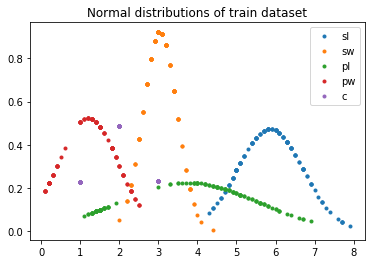

In [25]:
# libraries
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
import math

def pdf(x, mean, std):
    return (np.exp(-np.power(x - mean, 2.) / (2 * np.power(std, 2.)))) / (std * np.power(2 * math.pi, 1/2))
# end of def pdf

# loop in columns of dataset
for clm in train_dataset.columns:
    mean, std = train_dataset[clm].mean(), train_dataset[clm].std()
    gaussian = pdf(train_dataset[clm], mean, std)
    plt.plot(train_dataset[clm], gaussian, ".")
# end of for loop

# plotting
plt.title("Normal distributions of train dataset")
plt.legend()
plt.show()

In [48]:
train_dataset_1 = train_dataset.loc[[idx for idx, item in train_dataset.iterrows() if item.c == 1]]
train_dataset_2 = train_dataset.loc[[idx for idx, item in train_dataset.iterrows() if item.c == 2]]
train_dataset_3 = train_dataset.loc[[idx for idx, item in train_dataset.iterrows() if item.c == 3]]

#df = df.groupby('domain')['ID'].nunique()
t1 = train_dataset.groupby("c").nunique()
p1 = t1 / np.sum(t1, axis=0)
p1
#p_c = {idx: item for idx, item in train_dataset["c"].iteritems() if item != "sl"}
#p_c

,sl,sw,pl,pw,c
c,,,,,
1,0.267857,0.357143,0.173913,0.230769,0.333333
2,0.375000,0.333333,0.391304,0.307692,0.333333
3,0.357143,0.309524,0.434783,0.461538,0.333333


In [185]:
classes = train_dataset["c"].unique()
columns = np.array([item for item in train_dataset.columns if item != "c"])

means = np.zeros([len(columns), len(classes)])
means
for cls in classes:
    sample_dataset = train_dataset.loc[[idx for idx, item in train_dataset.iterrows() if item.c == cls]]
    for clm in columns:
        [item.mean() for idx, item in sample_dataset.iteritems() if idx == clm]

#for idx, item in train_dataset.iteritems():
    

[5.004444444444444]
[3.3866666666666667]
[1.4644444444444447]
[0.2444444444444444]
[5.944444444444445]
[2.7533333333333334]
[4.24]
[1.3155555555555556]
[6.61086956521739]
[2.9717391304347816]
[5.567391304347825]
[2.0173913043478255]


In [165]:
arr = np.array([item for idx, item in train_dataset.iterrows() if item.c == 1])
sample_dataset = train_dataset.loc[[idx for idx, item in train_dataset.iterrows() if item.c == 1]]
means = {idx: item.mean() for idx, item in sample_dataset.iteritems() if idx != "sl"}
means

{'c': 1.0,
 'pl': 1.4644444444444447,
 'pw': 0.2444444444444444,
 'sw': 3.3866666666666667}

In [20]:
import math

cls = "c"

p_c = {idx: item / total for idx, item in train_dataset[cls].value_counts().iteritems()}

# go-out = P(pdf(weather)|class=go-out) * P(pdf(car)|class=go-out) * P(class=go-out)

possibilities = {}
for test_idx, test_item in test_dataset.iterrows():
    print("test_item.c:",test_item.c)
    if test_idx != "c":
        sample_dataset = train_dataset.loc[[idx for idx, item in train_dataset.iterrows() if item.c == 1]]
        means = {idx: item.mean() for idx, item in sample_dataset.iteritems() if idx != test_idx}
        stds = {idx: item.std() for idx, item in sample_dataset.iteritems() if idx != test_idx}
        print("means:", means)
        print("stds:", stds)


test_item.c: 1.0
means: {'sl': 5.004444444444444, 'sw': 3.3866666666666667, 'pl': 1.4644444444444447, 'pw': 0.2444444444444444, 'c': 1.0}
stds: {'sl': 0.3573612607811187, 'sw': 0.37755192297941553, 'pl': 0.15397100605981215, 'pw': 0.10986676963808062, 'c': 0.0}
test_item.c: 1.0
means: {'sl': 5.004444444444444, 'sw': 3.3866666666666667, 'pl': 1.4644444444444447, 'pw': 0.2444444444444444, 'c': 1.0}
stds: {'sl': 0.3573612607811187, 'sw': 0.37755192297941553, 'pl': 0.15397100605981215, 'pw': 0.10986676963808062, 'c': 0.0}
test_item.c: 1.0
means: {'sl': 5.004444444444444, 'sw': 3.3866666666666667, 'pl': 1.4644444444444447, 'pw': 0.2444444444444444, 'c': 1.0}
stds: {'sl': 0.3573612607811187, 'sw': 0.37755192297941553, 'pl': 0.15397100605981215, 'pw': 0.10986676963808062, 'c': 0.0}
test_item.c: 1.0
means: {'sl': 5.004444444444444, 'sw': 3.3866666666666667, 'pl': 1.4644444444444447, 'pw': 0.2444444444444444, 'c': 1.0}
stds: {'sl': 0.3573612607811187, 'sw': 0.37755192297941553, 'pl': 0.15397100

## References
* Scikit-learn, Naive Bayes, http://scikit-learn.org/stable/modules/naive_bayes.html (30/10/2017)
* Machine Learing Mastery, https://machinelearningmastery.com/naive-bayes-for-machine-learning/ (30/10/2017)